In [43]:
import importlib
import func
importlib.reload(func)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
pd.options.display.max_rows = 100
%matplotlib inline
importlib.reload(func)
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import svm
from sklearn.svm import NuSVC
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

In [6]:
df_101_tier = pd.read_excel("df_101_tier.xlsx")
df_101_tier = df_101_tier.set_index("RTN")

## 1. Use all features and Oversampling

In [36]:
X = df_101_tier.iloc[:, :-1]
y = df_101_tier.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=2015)

In [37]:
X_train, y_train = SMOTE().fit_sample(X_train, y_train)
print(X_train.shape)
print(Counter(y_train).items())
print(X_train.shape)
print("Training size: %r" %X_train.shape[0])
print("Test size: %r" %X_test.shape[0])

(17860, 143)
dict_items([(1, 8930), (0, 8930)])
(17860, 143)
Training size: 17860
Test size: 3256


Confusion matrix, without normalization
[[ 213   65]
 [1292 1686]]
             precision    recall  f1-score   support

    Tier 1D       0.14      0.77      0.24       278
      other       0.96      0.57      0.71      2978

avg / total       0.89      0.58      0.67      3256



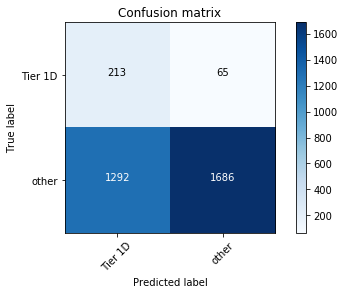

In [38]:
rf = RandomForestClassifier(max_depth=3, n_estimators=200, max_features=0.2, n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 204   74]
 [1145 1833]]
             precision    recall  f1-score   support

    Tier 1D       0.15      0.73      0.25       278
      other       0.96      0.62      0.75      2978

avg / total       0.89      0.63      0.71      3256



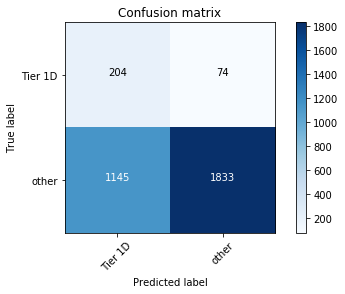

In [40]:
svc = LinearSVC(dual=False, C=0.01, penalty='l1')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

In [ ]:
# {'C': 0.1, 'dual': False, 'penalty': 'l2'}
lg = LogisticRegression(C=0.1, dual=False, )
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, labels=[True, False], target_names=['Tier 1D','other']))

In [30]:
clfs = func.Clf(X, y)
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, True)
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, True)
clfs.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, True)
clfs.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, True)

In [41]:
clfs.runKfold(LogisticRegression, {"penalty": ['l2'], 'dual': [True], "C": [0.01, 0.1, 1, 10, 100]}, True)

In [44]:
clfs.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.138360,0.204874,0.163208,0.948186,0.921714,0.934710
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.135662,0.200825,0.159717,0.948354,0.921510,0.934683
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.141974,0.224345,0.173460,0.953981,0.922456,0.937945
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.749336,0.142305,0.239182,0.577847,0.961038,0.721718
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.731367,0.143720,0.240223,0.592627,0.959351,0.732635
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.772714,0.143577,0.242135,0.569365,0.964117,0.715846
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.731363,0.147047,0.244860,0.603460,0.960053,0.741082
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.725084,0.148036,0.245842,0.609926,0.959617,0.745729
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.728685,0.147748,0.245679,0.607239,0.959930,0.743892
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.718793,0.150312,0.248620,0.620255,0.959366,0.753383


In [34]:
clfs.clf_eval.loc[5, 'params']

{'max_depth': 3, 'max_features': 0.2, 'n_estimators': 200}